<a href="https://colab.research.google.com/github/saumyayadav25/Customer-Segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('Mall_Customers.csv')

# Exploring the Dataset

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Cleaning

In [16]:
# Dropping the column 'CustomerID' as it does not provide any value
df.drop('CustomerID', axis=1, inplace=True)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Visualization


## Univariate Analysis

/tmp/ipython-input-3099329715.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipython-input-3099329715.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipython-input-3099329715.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

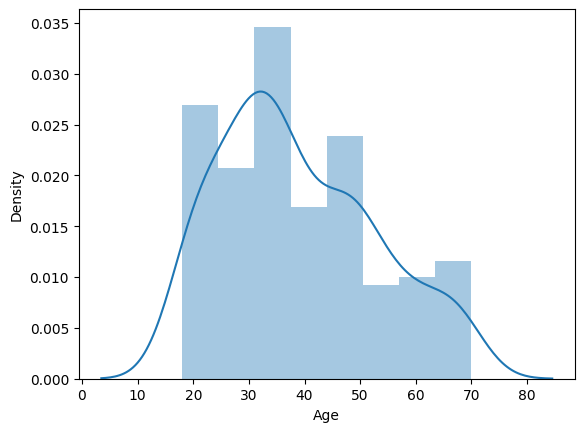

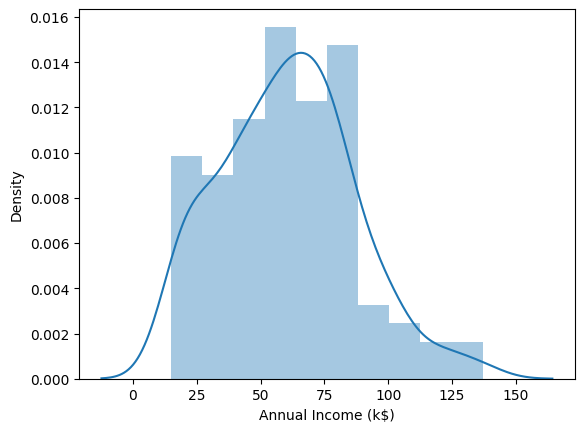

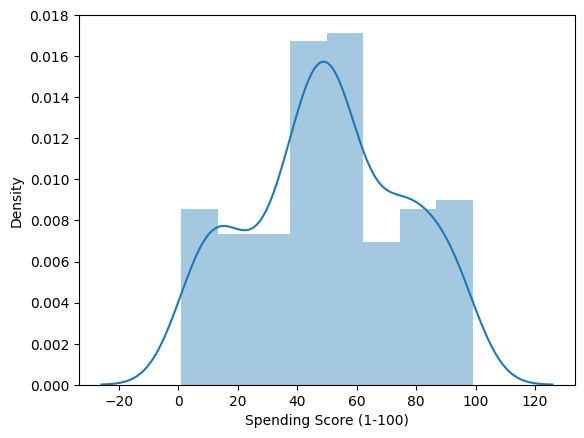

In [28]:
# understanding data distribution
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

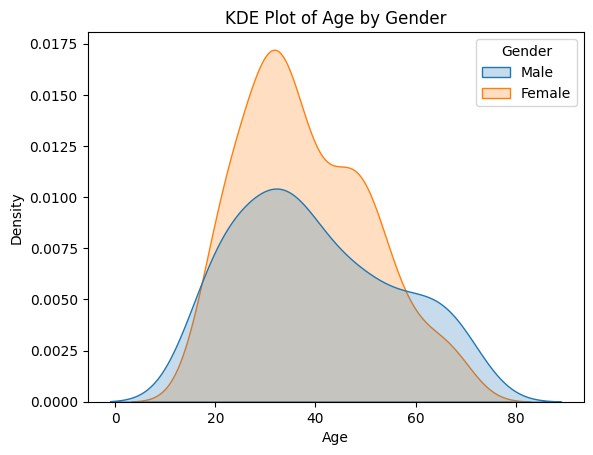

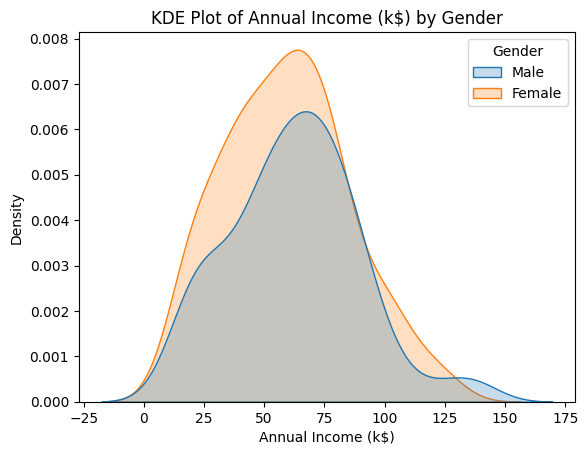

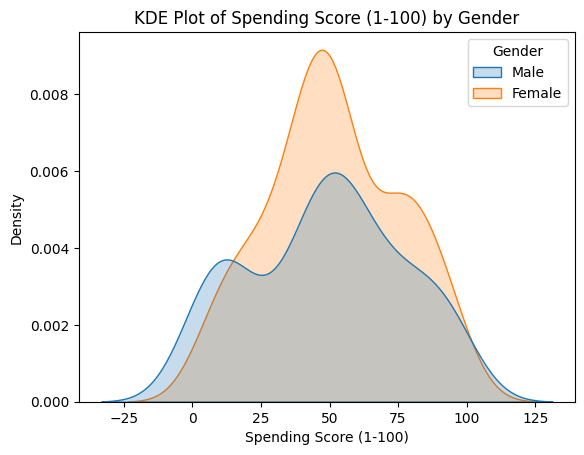

In [29]:
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Gender', fill=True)
    plt.title(f'KDE Plot of {col} by Gender')
    plt.show()

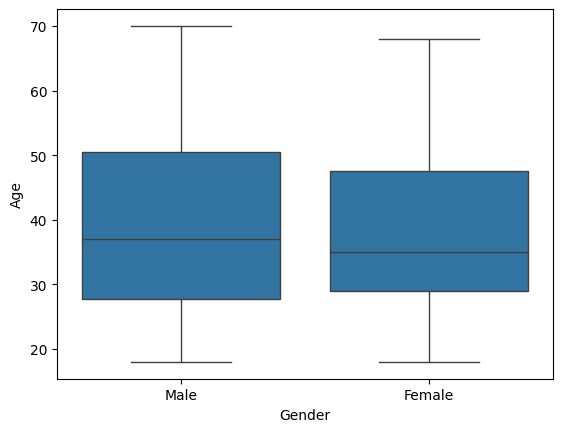

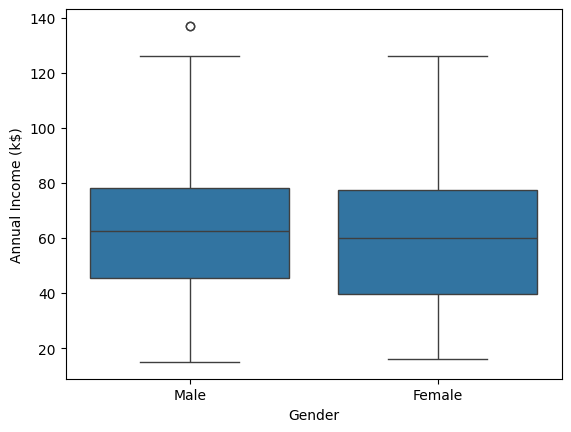

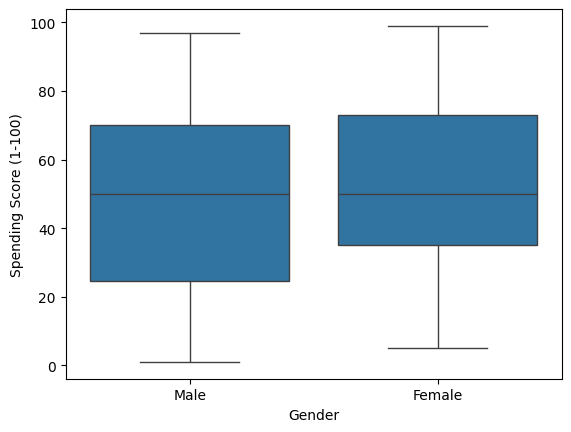

In [30]:
# checking for outliers
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [36]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


Text(0, 0.5, 'Count')

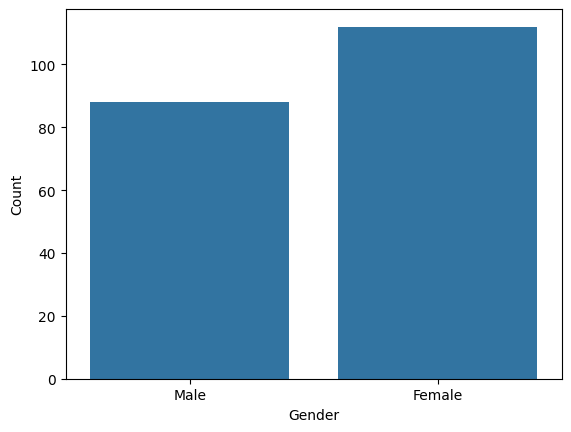

In [37]:
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')

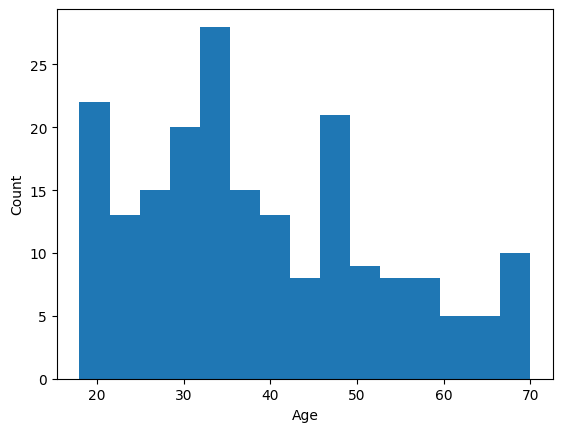

In [39]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=df['Age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

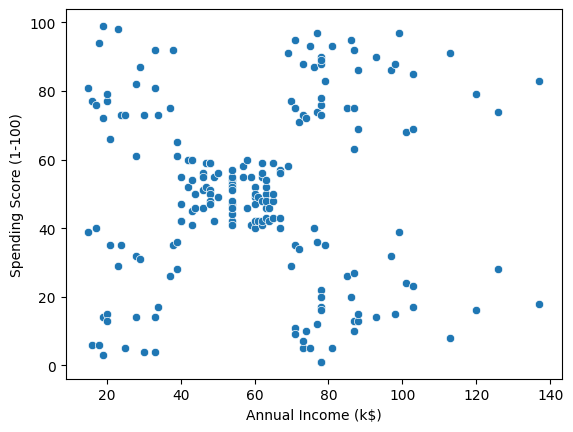

In [40]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

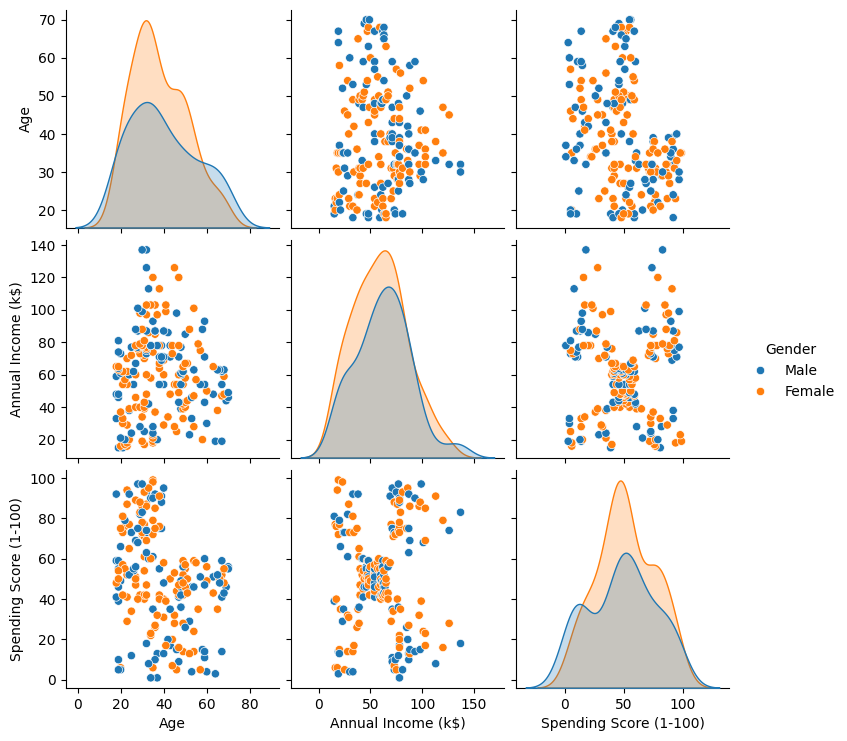

In [41]:
sns.pairplot(df,hue='Gender')

In [45]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

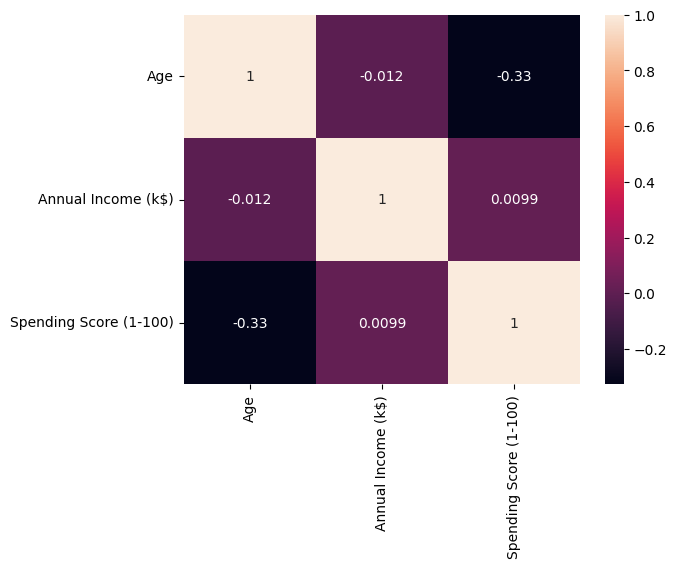

In [46]:
sns.heatmap(df_numeric.corr(),annot=True)

# Data Preprocessing

In [47]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = df.iloc[:, [2,3]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Finding optimal number of clusters using Elbow Method

**using parameter WCSS -> Within Clusters Sum of Squares**

In [48]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

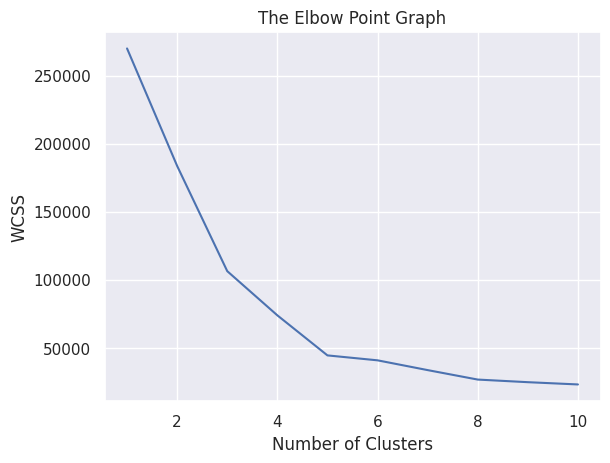

In [52]:
# plotting elbow graph

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot it is observed

- we have 2 elbow points 3 and 5

 We will chose 5 clusters as optimal for the given dataset(because after this there is no sharp significant drop)

 Therefore, **Optimum Number of Clusters = 5**


# Training k-Means Clustering Model

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

In [56]:
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters -  0, 1, 2, 3, 4

# Visualizing the Clusters

In [60]:
X_np = X.values # X was dataframe

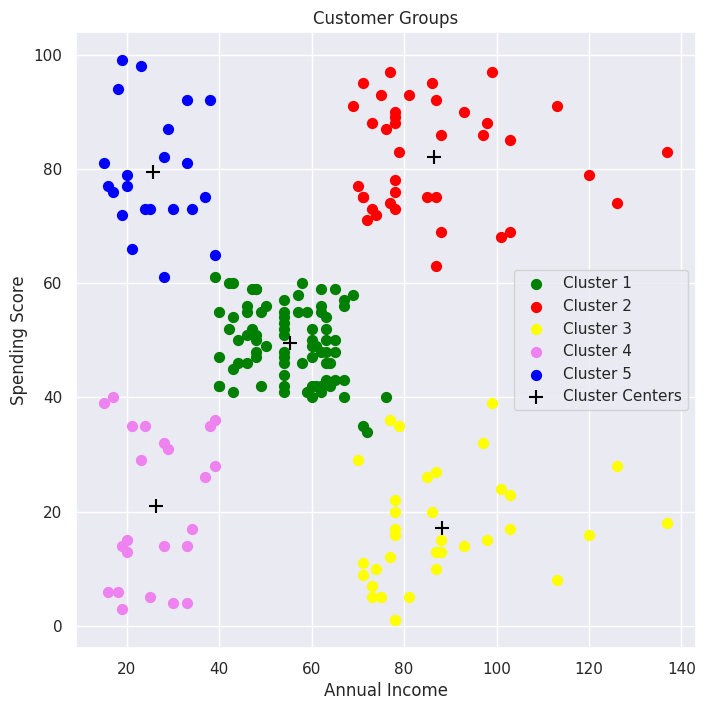

In [64]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X_np[Y==0,0], X_np[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_np[Y==1,0], X_np[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_np[Y==2,0], X_np[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_np[Y==3,0], X_np[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_np[Y==4,0], X_np[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')

plt.legend()
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()